In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import ttest_ind

In [2]:
# Load your data
df = pd.read_csv("selected_analysis.csv")
#simple 0, complex-1

In [3]:
# 1. Data Exploration
print(df.info())
print(df.describe())
print(df['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   File Name            69 non-null     object 
 1   Total Faces          69 non-null     int64  
 2   Curved Faces         69 non-null     int64  
 3   Total Edges          69 non-null     int64  
 4   Vertices             69 non-null     int64  
 5   Bounding Box Volume  69 non-null     float64
 6   Mean Curvature       69 non-null     float64
 7   Curvature Std Dev    69 non-null     float64
 8   Volume               69 non-null     float64
 9   Hole Count           69 non-null     int64  
 10  size                 69 non-null     float64
 11  ispart               69 non-null     int64  
 12  Criteria Met         69 non-null     int64  
 13  Class                69 non-null     int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 7.7+ KB
None
       Total Faces  Curved Fac

C:\Users\Student\AppData\Local\Temp/ipykernel_12640/1697679940.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


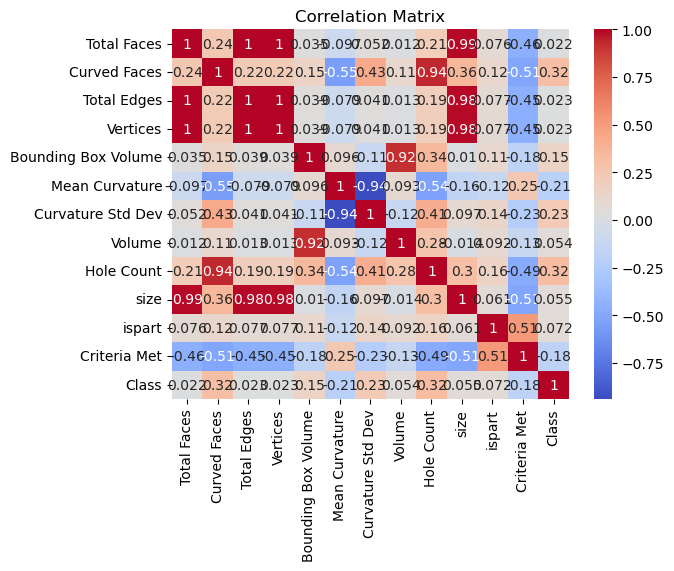

In [4]:
# Check correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [5]:
# 2. Statistical Analysis
for column in df.columns[1:-2]:  # Exclude File Name, Criteria Met, and Class
    group_0 = df[df['Class'] == 0][column]
    group_1 = df[df['Class'] == 1][column]
    t_stat, p_val = ttest_ind(group_0, group_1)
    print(f"{column}: t-stat={t_stat:.4f}, p-value={p_val:.4f}")

Total Faces: t-stat=-0.1809, p-value=0.8570
Curved Faces: t-stat=-2.7287, p-value=0.0081
Total Edges: t-stat=-0.1891, p-value=0.8506
Vertices: t-stat=-0.1891, p-value=0.8506
Bounding Box Volume: t-stat=-1.2326, p-value=0.2220
Mean Curvature: t-stat=1.7800, p-value=0.0796
Curvature Std Dev: t-stat=-1.9428, p-value=0.0562
Volume: t-stat=-0.4432, p-value=0.6591
Hole Count: t-stat=-2.7994, p-value=0.0067
size: t-stat=-0.4545, p-value=0.6510
ispart: t-stat=-0.5894, p-value=0.5576


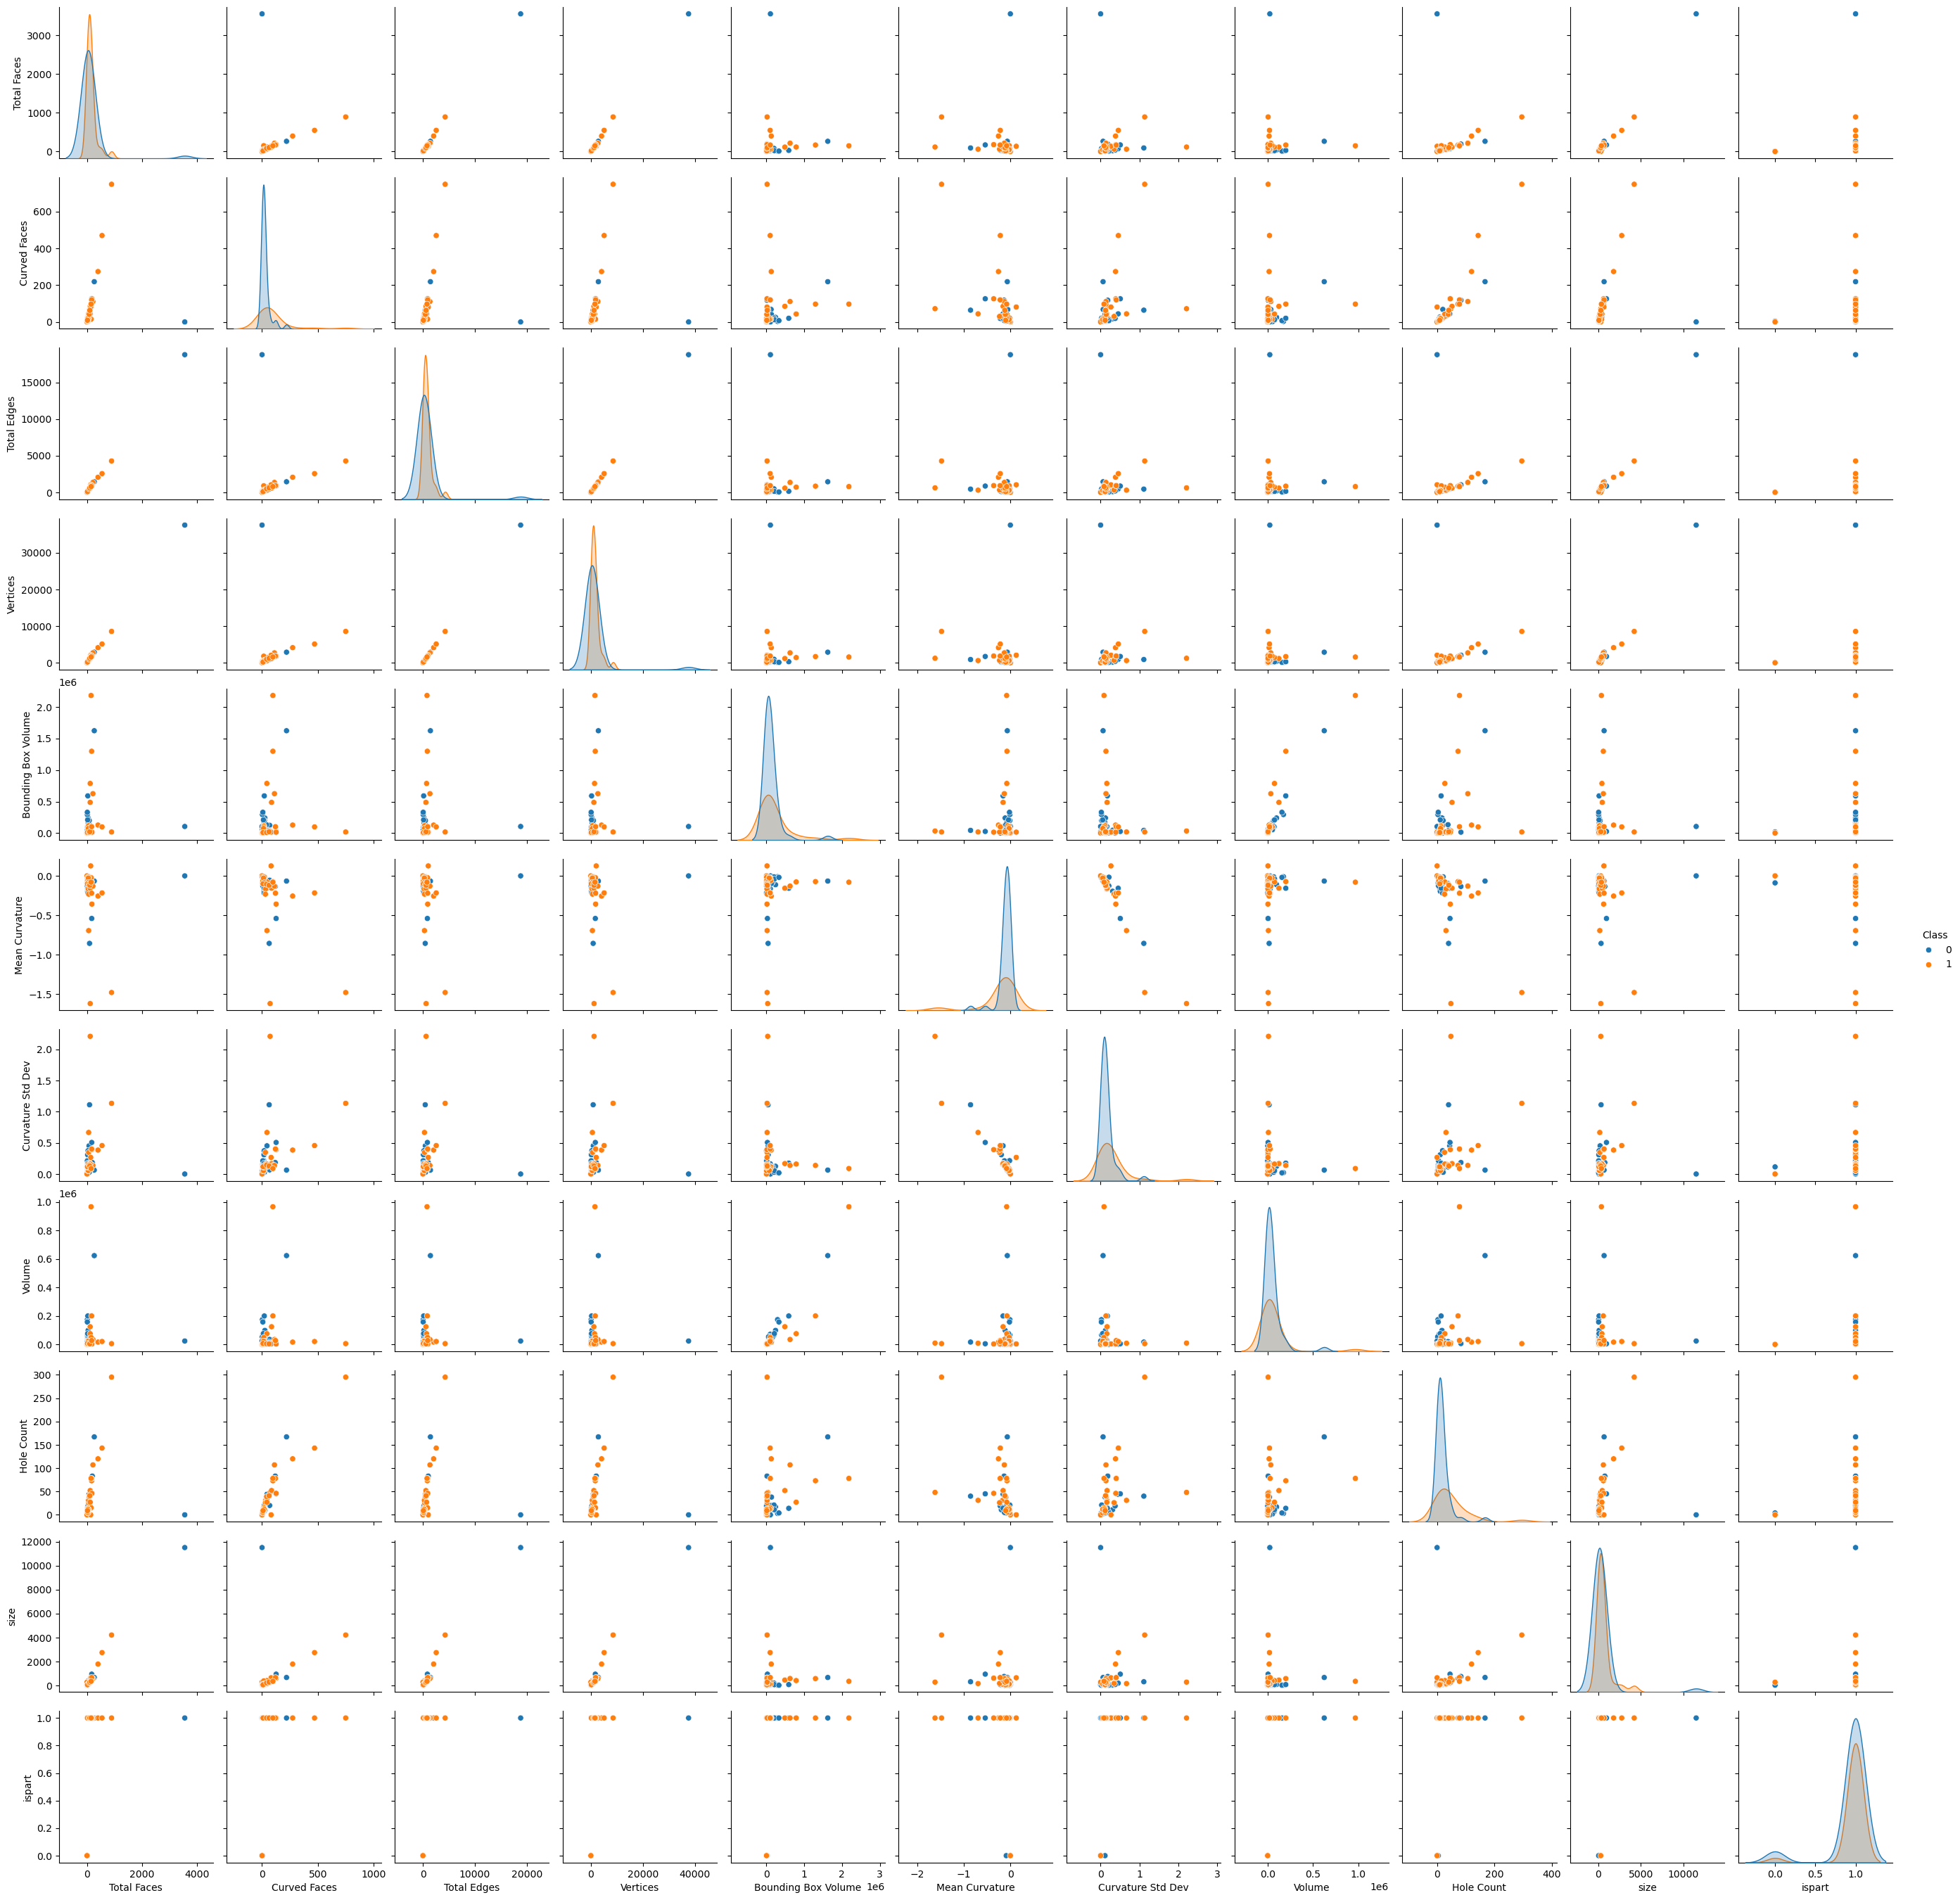

In [6]:
# 3. Pairwise Scatter Plots
sns.pairplot(df, hue='Class', vars=['Total Faces', 'Curved Faces', 'Total Edges',
                                    'Vertices', 'Bounding Box Volume', 'Mean Curvature',
                                    'Curvature Std Dev', 'Volume', 'Hole Count', 'size', 'ispart'])
plt.show()

In [7]:
# 4. Classification with Random Forest
X = df[['Total Faces', 'Curved Faces', 'Total Edges', 'Vertices',
        'Bounding Box Volume', 'Mean Curvature', 'Curvature Std Dev',
        'Volume', 'Hole Count', 'size', 'ispart']]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  3]
 [ 2  6]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.67      0.75      0.71         8

    accuracy                           0.76        21
   macro avg       0.75      0.76      0.75        21
weighted avg       0.77      0.76      0.76        21



In [9]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
                Feature  Importance
2           Total Edges    0.174127
3              Vertices    0.172207
9                  size    0.120856
7                Volume    0.096687
4   Bounding Box Volume    0.083988
6     Curvature Std Dev    0.081732
8            Hole Count    0.078208
0           Total Faces    0.071175
1          Curved Faces    0.060152
5        Mean Curvature    0.059622
10               ispart    0.001246


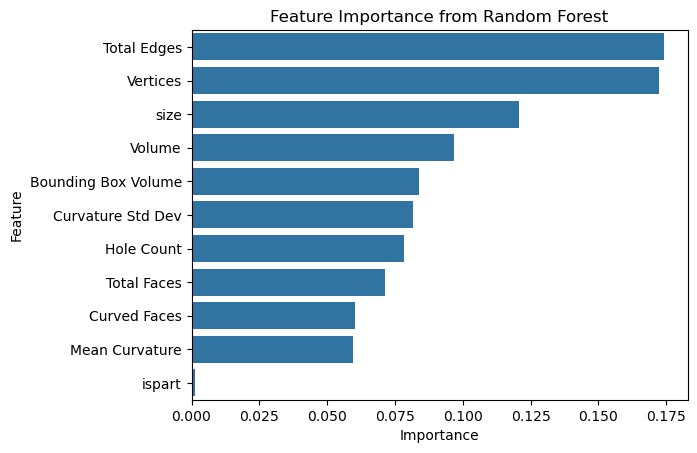

In [10]:
# Plot Feature Importance
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance from Random Forest")
plt.show()

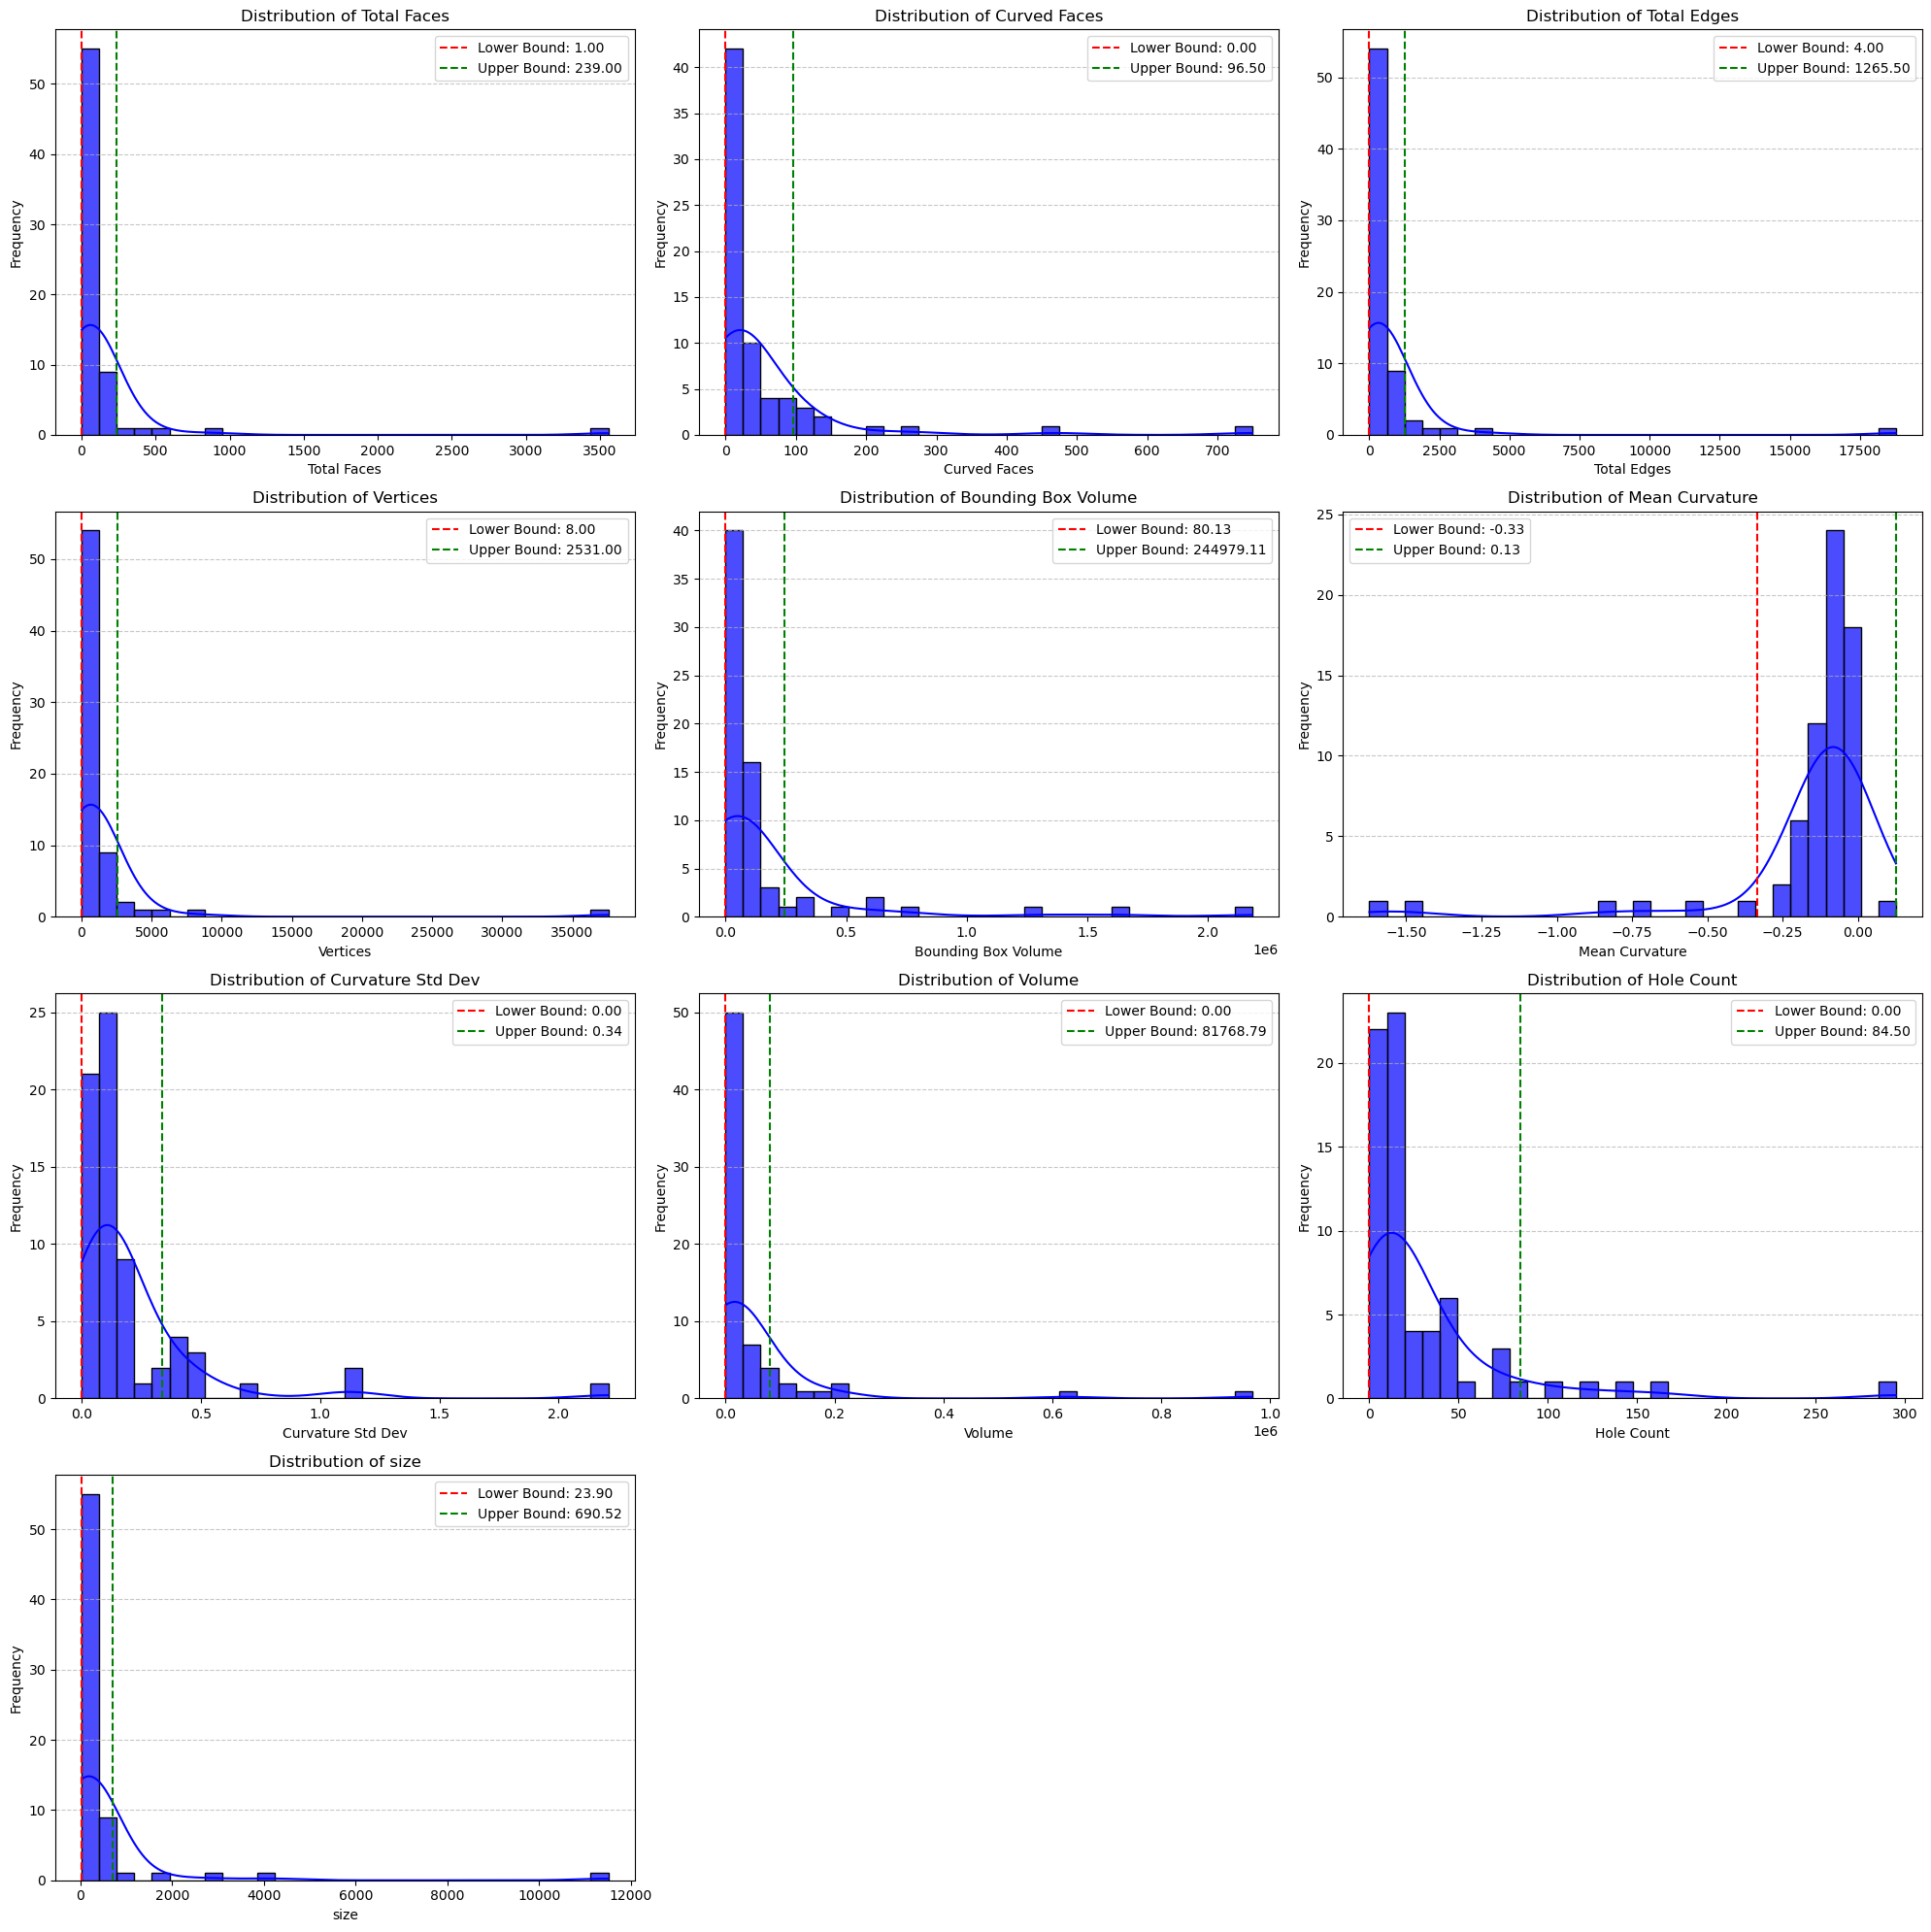

Feature Ranges:
Total Faces: {'Lower Bound': 1, 'Upper Bound': 239.0, 'IQR': 86.0}
Curved Faces: {'Lower Bound': 0, 'Upper Bound': 96.5, 'IQR': 35.0}
Total Edges: {'Lower Bound': 4, 'Upper Bound': 1265.5, 'IQR': 457.0}
Vertices: {'Lower Bound': 8, 'Upper Bound': 2531.0, 'IQR': 914.0}
Bounding Box Volume: {'Lower Bound': 80.1255067, 'Upper Bound': 244979.11050000004, 'IQR': 92599.22760000001}
Mean Curvature: {'Lower Bound': -0.334738686, 'Upper Bound': 0.126635539, 'IQR': 0.118767396}
Curvature Std Dev: {'Lower Bound': 0.0, 'Upper Bound': 0.338581347, 'IQR': 0.109745518}
Volume: {'Lower Bound': 7.97e-13, 'Upper Bound': 81768.793611, 'IQR': 31230.872054}
Hole Count: {'Lower Bound': 0, 'Upper Bound': 84.5, 'IQR': 31.0}
size: {'Lower Bound': 23.90234375, 'Upper Bound': 690.519043055, 'IQR': 250.89746097}


In [22]:
# Define the features to analyze
features = ['Total Faces', 'Curved Faces', 'Total Edges', 'Vertices',
            'Bounding Box Volume', 'Mean Curvature', 'Curvature Std Dev',
            'Volume', 'Hole Count', 'size']

# Create a directory to store the results
feature_ranges = {}

# Set up the subplots
total_features = len(features)
fig, axes = plt.subplots(nrows=(total_features + 2) // 3, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for idx, feature in enumerate(features):
    ax = axes[idx]

    # Plot distribution
    sns.histplot(df[feature], kde=True, bins=30, color="blue", alpha=0.7, ax=ax)
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Calculate the range where most files lie (e.g., the interquartile range)
    q1 = np.percentile(df[feature], 25)  # 25th percentile
    q3 = np.percentile(df[feature], 75)  # 75th percentile
    iqr = q3 - q1  # Interquartile range

    lower_bound = max(df[feature].min(), q1 - 1.5 * iqr)  # Whisker lower bound
    upper_bound = min(df[feature].max(), q3 + 1.5 * iqr)  # Whisker upper bound

    # Highlight the range on the plot
    ax.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
    ax.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')
    ax.legend()

    # Save the range for this feature
    feature_ranges[feature] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "IQR": iqr
    }

# Remove any unused subplots
for idx in range(len(features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Display ranges for all features
print("Feature Ranges:")
for feature, ranges in feature_ranges.items():
    print(f"{feature}: {ranges}")


In [19]:
# Define the criteria
criteria = (
    (20 <= df["Total Faces"]) & (df["Total Faces"] <= 120) &
    (5 <= df["Curved Faces"]) & (df["Curved Faces"] <= 50) &
    (100 <= df["Total Edges"]) & (df["Total Edges"] <= 700) &
    (200 <= df["Vertices"]) & (df["Vertices"] <= 1500) &
    (1e3 <= df["Volume"]) & (df["Volume"] <= 1.5e5) &
    (5 <= df["Hole Count"]) & (df["Hole Count"] <= 50) &
    (25 <= df["size"]) & (df["size"] <= 500) &
    (df["ispart"] == 1)
)

# Filter rows that satisfy the criteria
filtered_df = df[criteria]
# Print the file names of the matching rows
print("Files satisfying the criteria:")
filtered_df.describe()


Files satisfying the criteria:


,Total Faces,Curved Faces,Total Edges,Vertices,Bounding Box Volume,Mean Curvature,Curvature Std Dev,Volume,Hole Count,size,ispart,Criteria Met,Class
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000
mean,43.666667,20.466667,240.766667,481.533333,63589.746359,-0.109901,0.152113,19472.904404,16.433333,120.039225,1.0,9.500000,0.300000
std,19.064922,10.871454,116.986201,233.972402,67578.422636,0.123992,0.133527,24311.698402,10.394572,72.990507,0.0,0.731083,0.466092
min,22.000000,6.000000,102.000000,204.000000,3331.979414,-0.695411,0.027144,1233.095808,6.000000,47.698242,1.0,8.000000,0.000000
25%,26.500000,13.250000,145.000000,290.000000,13540.781255,-0.116652,0.069268,4441.902257,10.000000,72.257324,1.0,9.000000,0.000000
50%,39.000000,17.500000,218.000000,436.000000,34082.499880,-0.083717,0.115651,8778.677501,12.000000,100.446777,1.0,10.000000,0.000000
75%,55.750000,25.000000,297.000000,594.000000,86917.171225,-0.043530,0.156416,22987.720042,17.000000,160.811035,1.0,10.000000,1.000000
max,82.000000,44.000000,484.000000,968.000000,241083.344600,-0.011987,0.666026,98306.944910,44.000000,392.087891,1.0,10.000000,1.000000


In [20]:
filtered_df

,File Name,Total Faces,Curved Faces,Total Edges,Vertices,Bounding Box Volume,Mean Curvature,Curvature Std Dev,Volume,Hole Count,size,ispart,Criteria Met,Class
2,00006039.step,52,25,280,560,36036.351280,-0.066479,0.078744,9579.320921,17,392.087891,1,10,0
3,00006069.step,41,25,196,392,241083.344600,-0.112014,0.123923,98306.944910,17,86.668945,1,9,0
5,00006247.step,25,19,123,246,87248.001700,-0.055186,0.059585,38737.446480,10,51.981445,1,10,0
7,00006443.step,26,16,126,252,4934.085032,-0.099269,0.101230,1233.095808,10,167.781250,1,10,0
10,00006678.step,32,27,148,296,103282.418400,-0.163452,0.163281,27231.562160,10,73.405273,1,9,0
11,00009692.step,75,44,468,936,47318.726060,-0.157154,0.452116,1542.666546,44,199.170898,1,8,0
14,00009732.step,24,17,102,204,46906.105600,-0.195347,0.308798,3691.613476,11,47.698242,1,8,0
16,00009764.step,34,23,182,364,23443.904790,-0.167005,0.159557,9950.211744,16,84.229492,1,9,0
18,00009783.step,52,14,288,576,74587.501300,-0.036316,0.066110,10432.917670,14,120.258789,1,10,0
20,00009813.step,24,6,134,268,85924.679800,-0.071528,0.134670,23013.470970,6,55.783203,1,10,0
